# 1 часть

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1.3

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1) Разбиение датасета на тренировочную, валидационную и тестовую выборки

In [4]:
train_validation, test = train_test_split(df, test_size = 0.25)
train, validation = train_test_split(train_validation, test_size = 0.5)

2) преобразование категориального признака ocean_proximity через кодировку Dummy

In [5]:
train = pd.get_dummies(train, columns=['ocean_proximity'])
test = pd.get_dummies(test, columns=['ocean_proximity'])
validation = pd.get_dummies(validation, columns=['ocean_proximity'])

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7144,-118.13,34.02,41.0,734.0,190.0,565.0,191.0,2.2813,192000.0,1,0,0,0,0
8747,-118.35,33.82,28.0,7591.0,1710.0,3420.0,1635.0,4.0708,328900.0,1,0,0,0,0
19638,-120.97,37.43,27.0,1380.0,NaN,810.0,262.0,2.1875,137500.0,0,1,0,0,0
13064,-121.32,38.57,25.0,692.0,146.0,504.0,167.0,3.6897,101100.0,0,1,0,0,0
4810,-118.36,34.02,43.0,1356.0,333.0,796.0,329.0,1.7159,189700.0,1,0,0,0,0


3) Замена признаков total_rooms и total_bedrooms на average_* путем деления на households

In [7]:
train['total_rooms'] /= train['households']
train['total_bedrooms'] /= train['households']
train.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [8]:
test['total_rooms'] /= test['households']
test['total_bedrooms'] /= test['households']
test.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [9]:
validation['total_rooms'] /= validation['households']
validation['total_bedrooms'] /= validation['households']
validation.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [10]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7144,-118.13,34.02,41.0,3.842932,0.994764,565.0,191.0,2.2813,192000.0,1,0,0,0,0
8747,-118.35,33.82,28.0,4.642813,1.045872,3420.0,1635.0,4.0708,328900.0,1,0,0,0,0
19638,-120.97,37.43,27.0,5.267176,NaN,810.0,262.0,2.1875,137500.0,0,1,0,0,0
13064,-121.32,38.57,25.0,4.143713,0.874251,504.0,167.0,3.6897,101100.0,0,1,0,0,0
4810,-118.36,34.02,43.0,4.121581,1.012158,796.0,329.0,1.7159,189700.0,1,0,0,0,0


In [11]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6462,-118.06,34.10,42.0,5.588652,1.109929,697.0,282.0,4.3523,283600.0,1,0,0,0,0
5467,-118.47,33.99,52.0,3.732843,1.095588,636.0,408.0,3.0682,412500.0,1,0,0,0,0
206,-122.23,37.79,49.0,5.365297,0.990868,859.0,219.0,2.2930,106300.0,0,0,0,1,0
10066,-120.74,39.39,18.0,5.883117,1.519481,152.0,77.0,1.3523,85700.0,0,1,0,0,0
16876,-122.40,37.60,30.0,4.982309,1.055866,2558.0,1074.0,3.5817,369300.0,0,0,0,0,1


In [12]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20341,-119.03,34.22,24.0,5.303876,1.017054,2220.0,645.0,4.7831,214200.0,1,0,0,0,0
4219,-118.28,34.11,45.0,4.840361,0.996988,633.0,332.0,3.1445,438300.0,1,0,0,0,0
20374,-118.84,34.16,18.0,5.967583,1.037328,2571.0,1018.0,5.2200,399400.0,1,0,0,0,0
6241,-117.97,34.06,31.0,5.062374,NaN,2194.0,497.0,3.2413,155500.0,1,0,0,0,0
3548,-118.61,34.25,16.0,5.716747,1.037905,3903.0,1451.0,5.5111,276600.0,1,0,0,0,0


4) Определение кол-ва отсутствующих значений и их удаление

In [13]:
train['nan'] = train['average_bedrooms'].apply(lambda x: 1 if math.isnan(x) else 0)
validation['nan'] = validation['average_bedrooms'].apply(lambda x: 1 if math.isnan(x) else 0)
test['nan'] = test['average_bedrooms'].apply(lambda x: 1 if math.isnan(x) else 0)

In [14]:
print('train: ',train['average_bedrooms'].isnull().sum())
print('validation: ',validation['average_bedrooms'].isnull().sum())
print('test: ',test['average_bedrooms'].isnull().sum())

train:  76
validation:  83
test:  48


In [15]:
train =  train[train['nan'] == 0]
validation = validation[validation['nan'] == 0]
test = test[test['nan'] == 0]

In [16]:
print('train: ',train['average_bedrooms'].isnull().sum())
print('validation: ',validation['average_bedrooms'].isnull().sum())
print('test: ',test['average_bedrooms'].isnull().sum())

train:  0
validation:  0
test:  0


In [17]:
train.drop('nan',axis=1, inplace=True)
validation.drop('nan',axis=1, inplace=True)
test.drop('nan',axis=1, inplace=True)

5) Нормализация признаков longitude и latitude

In [18]:
train['longitude'] -= np.mean(train['longitude'])
train['longitude'] /= np.std(train['longitude'])
train['latitude'] -= np.mean(train['latitude'])
train['latitude'] /= np.std(train['latitude'])

In [19]:
validation['longitude'] -= np.mean(validation['longitude'])
validation['longitude'] /= np.std(validation['longitude'])
validation['latitude'] -= np.mean(validation['latitude'])
validation['latitude'] /= np.std(validation['latitude'])

In [20]:
test['longitude'] -= np.mean(test['longitude'])
test['longitude'] /= np.std(test['longitude'])
test['latitude'] -= np.mean(test['latitude'])
test['latitude'] /= np.std(test['latitude'])

In [21]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7144,0.717291,-0.756796,41.0,3.842932,0.994764,565.0,191.0,2.2813,192000.0,1,0,0,0,0
8747,0.606784,-0.851103,28.0,4.642813,1.045872,3420.0,1635.0,4.0708,328900.0,1,0,0,0,0
13064,-0.885058,1.388677,25.0,4.143713,0.874251,504.0,167.0,3.6897,101100.0,0,1,0,0,0
4810,0.601761,-0.756796,43.0,4.121581,1.012158,796.0,329.0,1.7159,189700.0,1,0,0,0,0
14328,1.199502,-1.374504,7.0,3.889236,1.081123,951.0,641.0,4.2375,205000.0,0,0,0,0,1


In [22]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6462,0.741473,-0.704220,42.0,5.588652,1.109929,697.0,282.0,4.3523,283600.0,1,0,0,0,0
5467,0.536579,-0.755748,52.0,3.732843,1.095588,636.0,408.0,3.0682,412500.0,1,0,0,0,0
206,-1.342447,1.024322,49.0,5.365297,0.990868,859.0,219.0,2.2930,106300.0,0,0,0,1,0
10066,-0.597833,1.773825,18.0,5.883117,1.519481,152.0,77.0,1.3523,85700.0,0,1,0,0,0
16876,-1.427402,0.935318,30.0,4.982309,1.055866,2558.0,1074.0,3.5817,369300.0,0,0,0,0,1


In [23]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20341,0.283231,-0.669676,24.0,5.303876,1.017054,2220.0,645.0,4.7831,214200.0,1,0,0,0,0
4219,0.654993,-0.720781,45.0,4.840361,0.996988,633.0,332.0,3.1445,438300.0,1,0,0,0,0
20374,0.377410,-0.697551,18.0,5.967583,1.037328,2571.0,1018.0,5.2200,399400.0,1,0,0,0,0
3548,0.491417,-0.655738,16.0,5.716747,1.037905,3903.0,1451.0,5.5111,276600.0,1,0,0,0,0
14336,1.205201,-1.366561,44.0,2.733624,1.117904,572.0,229.0,1.5909,262500.0,0,0,0,0,1


# 2 часть

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2.1.

In [25]:
df = pd.read_csv('Davis.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [27]:
train, test = train_test_split(df, test_size=50)

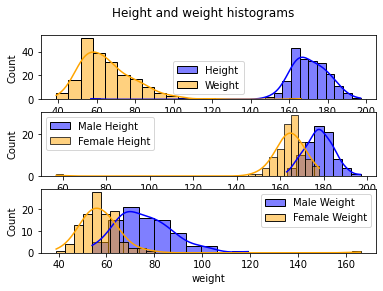

In [28]:
fig, ax = plt.subplots(nrows=3)
sns.histplot(df['height'], kde=True, color='blue', label='Height', ax = ax[0])
sns.histplot(df['weight'], kde=True, color='orange', label='Weight', ax = ax[0])
sns.histplot(df[df['sex'] == 'M']['height'], kde=True, color='blue', label='Male Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'F']['height'], kde=True, color='orange', label='Female Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'M']['weight'], kde=True, color='blue', label='Male Weight', ax = ax[2])
sns.histplot(df[df['sex'] == 'F']['weight'], kde=True, color='orange', label='Female Weight', ax = ax[2])
fig.suptitle('Height and weight histograms')
for axs in ax:
    axs.legend()

In [30]:
train.replace({'M':0, 'F':1}, inplace=True)
test.replace({'M':0, 'F':1}, inplace=True)

In [31]:
train.head()

,sex,weight,height,repwt,repht
139,0,85,191,83.0,188.0
77,1,63,160,64.0,158.0
183,1,63,165,59.0,160.0
82,1,53,169,52.0,175.0
112,1,55,174,57.0,171.0


In [32]:
test.head()

,sex,weight,height,repwt,repht
108,1,64,166,64.0,165.0
13,1,64,168,64.0,165.0
104,1,62,175,63.0,173.0
38,0,88,178,86.0,175.0
192,1,59,164,59.0,165.0


In [33]:
X_train = train.loc[:, 'weight':'height'].to_numpy()
y_train = train['sex'].to_numpy()
clf = LogisticRegression().fit(X_train, y_train)
print('Score: ', clf.score(X_train, y_train))

Score:  0.9


In [34]:
X_test = test.loc[:, 'weight':'height'].to_numpy()
y_test = test['sex'].to_numpy()
predictions = clf.predict(X_test)
print('Accuracy_score: ', accuracy_score(predictions, y_test))

Accuracy_score:  0.94


C:\Users\fenryux\AppData\Local\Temp/ipykernel_1568/4089504130.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)
C:\Users\fenryux\AppData\Local\Temp/ipykernel_1568/4089504130.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)


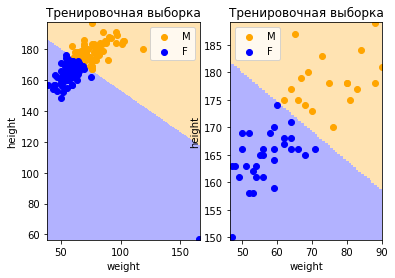

In [35]:
fig, ax = plt.subplots(ncols=2)

x_min, x_max = X_train[:, 0].min() - 0.5,  X_train[:, 0].max() + 0.5
y_min, y_max =  X_train[:, 1].min() - 0.5,  X_train[:, 1].max() + 0.5

h = 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_train)

ax[0].scatter(X_train[predictions == 0][:,0], X_train[predictions == 0][:,1], color='orange', label='M')
ax[0].scatter(X_train[predictions == 1][:,0], X_train[predictions == 1][:,1], color='blue', label='F')
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_title('Тренировочная выборка')
ax[0].legend()

x_min, x_max = X_test[:, 0].min() - 0.5,  X_test[:, 0].max() + 0.5
y_min, y_max =  X_test[:, 1].min() - 0.5,  X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_test)
ax[1].scatter(X_test[predictions == 0][:,0], X_test[predictions == 0][:,1], color='orange', label='M')
ax[1].scatter(X_test[predictions == 1][:,0], X_test[predictions == 1][:,1], color='blue', label='F')
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_title('Тренировочная выборка')
ax[1].legend()

# 2.2

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [38]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [39]:
validation, test = train_test_split(df, test_size=0.5)

In [40]:
X_validation = validation.loc[:, 'AT':'RH'].to_numpy()
y_validation = validation['PE'].to_numpy()

In [41]:
X_test = test.loc[:, 'AT':'RH'].to_numpy()
y_test = test['PE'].to_numpy()

In [42]:
lnr = LinearRegression().fit(X_validation, y_validation)
print('Score: ', lnr.score(X_validation, y_validation))

Score:  0.9314331194612347


In [43]:
predictions = lnr.predict(X_validation)
print('R2 = ', r2_score(predictions, y_validation))
print('MSE = ', mean_squared_error(predictions, y_validation))

R2 =  0.9263856104038621
MSE =  19.888385604879645


Text(0, 0.5, 'Оценка')

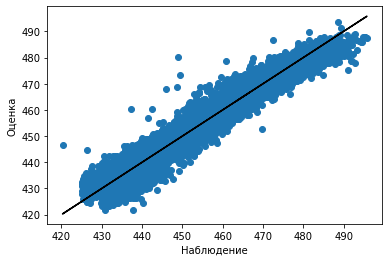

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_validation, predictions)
ax.plot(y_validation,y_validation, color='black')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')